## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

In [1]:
import numpy as np

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [2]:
def task_1(arr):
    return np.all(arr > 0)
print(task_1(np.array([1,2,-1])))
print(task_1(np.array([1,2,3,21])))

False
True


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [3]:
def task_2(arr, n):
    return np.repeat(arr , repeats = n , axis = 0)
print(task_2(np.array([1,2,3]),3))
print(task_2(np.array([[1,2],[3,4]]),2))
print(task_2(np.array([1]),2))

[1 1 1 2 2 2 3 3 3]
[[1 2]
 [1 2]
 [3 4]
 [3 4]]
[1 1]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [4]:
def task_3(V, v):
    if len(V) == 0 :
        return V
    summs = np.cumsum(V)[np.cumsum(v)-np.array([1])]
    return summs - np.hstack([[0] ,summs[:-1]]) 
print(task_3([1,2,3,4,5,6,7,8,9,10],[2,1,3]))
print(task_3([1,4,9,16,25],[1,2,2]))
print(task_3([9],[1]))
print(task_3([],[]))

[ 3  3 15]
[ 1 13 41]
[9]
[]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [5]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=[ 'label_id','label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

(7532, 3) (11314, 3)


<Axes: ylabel='label_name'>

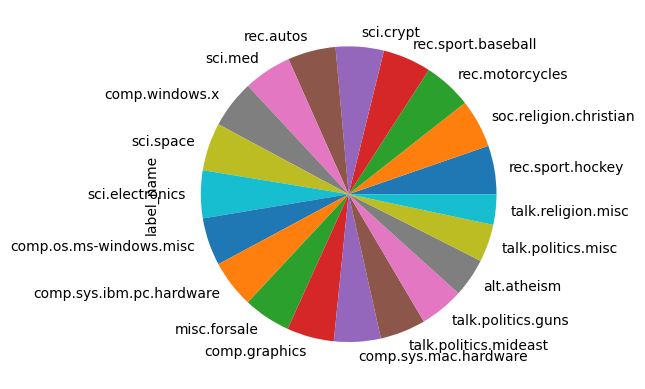

In [43]:
new_data = pd.merge(data,label_names,on = 'label_id' , how = 'right')
new_data.drop(['label_id'],axis = 1,inplace = True)
train_data = new_data[new_data['is_train']]
test_data = new_data[new_data['is_train'] == False]
print(test_data.shape,train_data.shape)

train_data['label_name'].value_counts().plot.pie()


__Задание 5 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [44]:
import re
def preprocess(text):    
    text = text.lower()
    text = re.sub('[^a-zA-Z\n\r\t]', ' ', text)
    return text.split()
# print("adsdADSADs\nad\t\rs\tdИгорь")
# print(preprocess("adsdADSADs\nad\t\rs\tdИгорь"))
def task_5(dt):
    return dt.assign(pp_text = dt['text'].apply(lambda x : preprocess(x)))
new_data = task_5(new_data)


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

Число уникальных слов:  115065


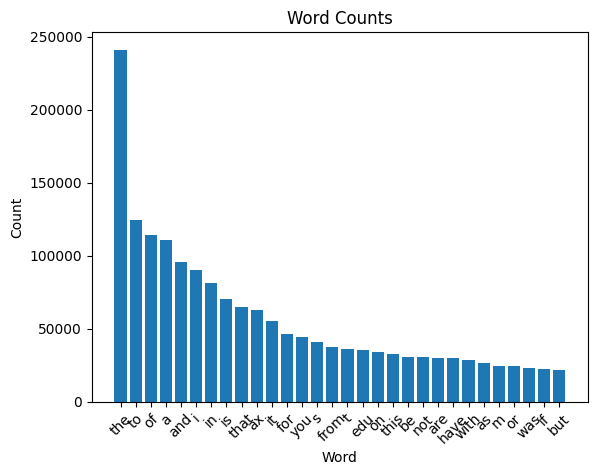

Число уникальных слов:  51551


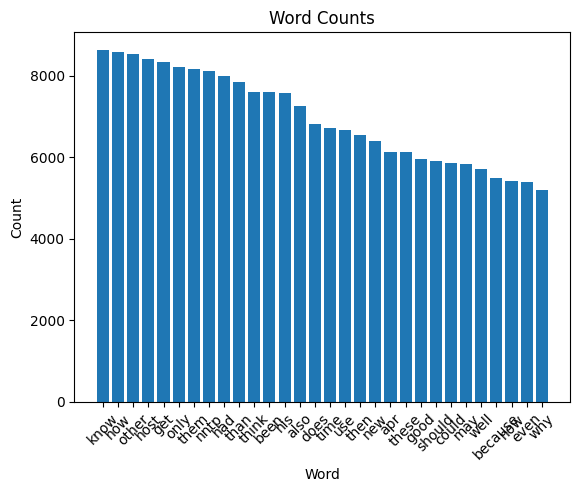

In [52]:
from collections import Counter
import matplotlib.pyplot as plt

vocabulary = Counter()

def hist(vocabulary):
    print("Число уникальных слов: ", len(vocabulary))
    words = list(vocabulary.keys())
    counts = list(vocabulary.values())
    data_words = pd.DataFrame({'word': words, 'count': counts})
    data_words_sorted = data_words.sort_values(by='count',ascending = False)[:30]
    plt.bar(data_words_sorted['word'], data_words_sorted['count'])
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title('Word Counts')
    plt.show()
def filter_data_by_vocabulary(data,vocabulary):
    data['pp_text'] = data['pp_text'].apply(lambda words: [word for word in words if word in vocabulary])
    return data
def filter_voc(vocabulary): 
    return {word: count for word, count in vocabulary.items() if count <= 9000 and 3 <= count and 3 <= len(word) and len(word) <= 20 and re.match(r'^(\w)\1+$', word) is None}
def vocabulary_update(dt) :
    for row, data in dt.iterrows() :
        vocabulary.update(data['pp_text'])
    return vocabulary
def task_6(dt):
    vocabulary = vocabulary_update(dt)
    hist(vocabulary)
    filtered_vocabulary = filter_voc(vocabulary)
    hist(filtered_vocabulary)
    return filtered_vocabulary
vocabulary = task_6(new_data)

__Задание 7 (1.5 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7(data):
    vocabulary_keys = list(vocabulary.keys())
    vectorizer = CountVectorizer(vocabulary = vocabulary_keys )


    X_train = np.array([" ".join(doc) for doc in data.loc[data['is_train'] == True]['pp_text']])
    X_test = np.array([" ".join(doc) for doc in data.loc[data['is_train'] == False]['pp_text']])

    train_vect = vectorizer.fit_transform(X_train).toarray()
    test_vect = vectorizer.transform(X_test).toarray()
    assert len(vectorizer.vocabulary_) == len(vocabulary)
    return train_vect, test_vect
train_vect , test_vect = task_7(new_data)

In [56]:
print(train_vect[:20], test_vect[:20])

[[3 2 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[3 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


__Задание 8 (1.5 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

Некотрые блоки кода взяты из ChatGPT

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

Y_train = new_data.loc[new_data['is_train'] == True]['label_name'].to_numpy()
Y_test = new_data.loc[new_data['is_train'] == False]['label_name'].to_numpy()


def task_8():
    # vectorizer = ...
    pass

    # assert len(vectorizer) == len(vocabulary)

In [60]:
model = LogisticRegression(
    penalty='l2',     
    C=1.0,            
    class_weight=None,
    solver='liblinear',
    multi_class='ovr'
)
model.fit(train_vect, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [61]:
print( accuracy_score(Y_test, model.predict(test_vect)) ,
f1_score(Y_test, model.predict(test_vect), average='micro') ,
f1_score(Y_test, model.predict(test_vect), average='macro') )

0.8074880509824748 0.8074880509824748 0.8014243356908842


In [64]:
model = GridSearchCV(
    LogisticRegression(
        solver='liblinear', 
        multi_class='ovr'
    ),
    cv=2,
    param_grid={"C": [0.005, 0.05]},
    scoring='accuracy'
)

model.fit(train_vect, Y_train)

GridSearchCV(cv=2,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [0.005, 0.05]}, scoring='accuracy')

In [65]:
print( accuracy_score(Y_test, model.predict(test_vect)) ,
f1_score(Y_test, model.predict(test_vect), average='micro') ,
f1_score(Y_test, model.predict(test_vect), average='macro') )

0.811603823685608 0.8116038236856081 0.8047242554756162


In [66]:
print(model.best_params_)

{'C': 0.05}


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


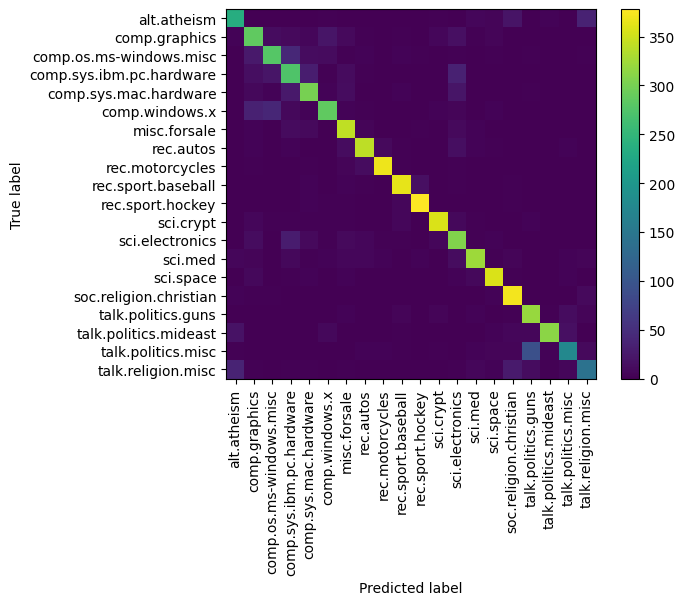

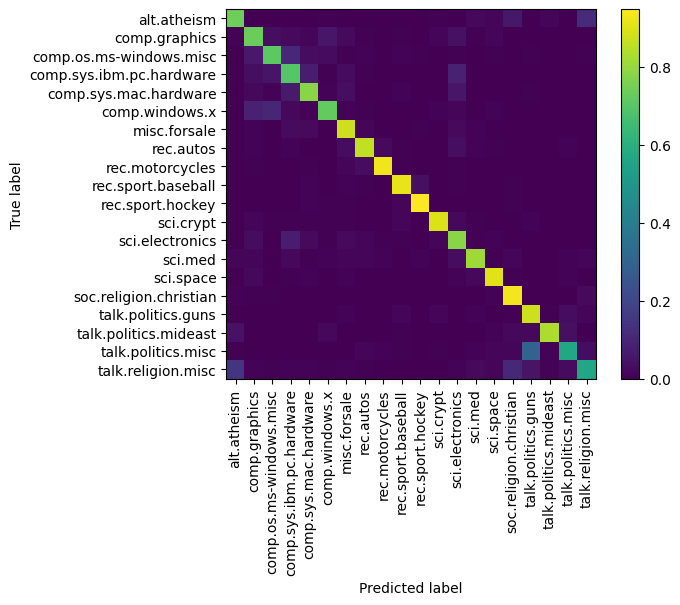

In [67]:
from sklearn.metrics import plot_confusion_matrix

def task_9():
    plot_confusion_matrix(model, test_vect, Y_test, include_values = False, xticks_rotation = 'vertical')
    plot_confusion_matrix(model, test_vect, Y_test, normalize = 'true', include_values = False, xticks_rotation = 'vertical')
task_9()

Чаще всего путаются : 

1) talk.politics.guns with talk.politics.misc
2) soc.religion.christian with talk.religion.misc
3) talk.religion.misc with alt.atheism
4) comp.graphics with comp.windows.x
5) comp.os.ms-windows.misc with comp.windows.x
6) sci.electronics with comp.sys.ibm.pc.hardware

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [68]:
from xgboost import XGBClassifier

def task_10():
    pass

Преобразование классов в числа

In [76]:
class_names = list(set(Y_train))
class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}

Y_train_num = [class_to_idx[class_name] for class_name in Y_train]
Y_test_num = [class_to_idx[class_name] for class_name in Y_test]


In [84]:
print(Y_train_num[:20])
print( Y_train[:20])

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
['alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism'
 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism'
 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism'
 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism' 'alt.atheism']


In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid)

grid_search.fit(train_vect, Y_train_num)

best_params = grid_search.best_params_
# y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test_num, grid_search.predict(test_vect))

__Задание 11 (3 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [132]:
data = filter_data_by_vocabulary(new_data,vocabulary)

In [133]:
print(len(data))

18846


In [135]:
def task_11(texts):
    graph = dict()
    for text in texts :
        for i in range(len(text)) :
            for j in range(1,10) :
                a = text[i]
                if i+j == len(text) :
                    break
                b = text[i+j]
                if a == b :
                    break
                # print(a , b)
                keys = tuple(set([a,b])) # Сортируем, чтобы было всегда name_1 -> name_2 ,А не name_2 -> name_1 в графе
                # print(keys)
                a = keys[0] 
                b = keys[1]
                if a not in graph.keys() :
                    graph[a] = dict()
                if b not in graph[a].keys() :
                    graph[a][b] = 1
                else :
                    graph[a][b] += 1
    return graph

print(task_11([["hey" , "bro" ,"how","are" ,"you" ,"bro"],["hey" , "hey" , "bro" , "hey"]]))
graph = task_11(np.array(data['pp_text']))

{'bro': {'hey': 4, 'how': 2, 'are': 2, 'you': 2}, 'how': {'hey': 1, 'are': 1, 'you': 1}, 'hey': {'are': 1, 'you': 1}, 'you': {'are': 1}}


__Задание 12 (3 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

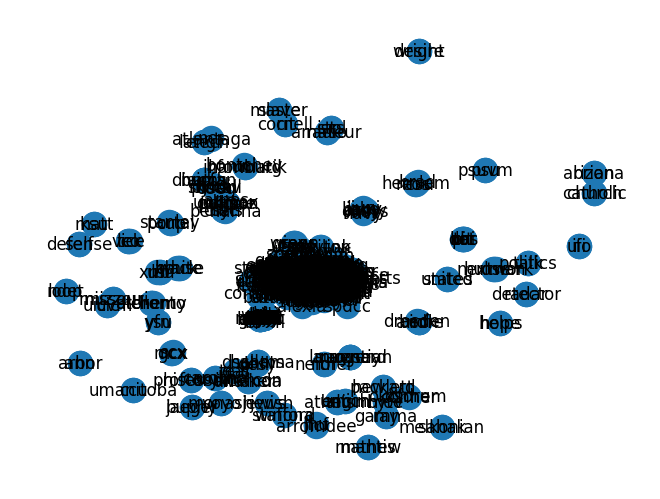

In [143]:
from networkx import Graph
import networkx as nx
from networkx.algorithms import community

G = Graph()
T = 120
for vertice, edges in graph.items():
    for connected_vertice, weight in edges.items():
        if weight > T :
            G.add_edge(vertice, connected_vertice, weight=weight)

nx.draw(G, with_labels=True)


All communities : 
[frozenset({'play', 'games', 'season', 'win', 'baseball', 'players', 'hockey', 'player', 'game', 'supply', 'power', 'team'}), frozenset({'mhz', 'tim', 'clock', 'orion', 'uci', 'cpu', 'ics', 'oac', 'low', 'speed', 'high'}), frozenset({'urbana', 'illinois', 'lis', 'cka', 'uiuc', 'cso', 'alexia', 'cobb', 'uxa'}), frozenset({'asd', 'livesey', 'jon', 'fido', 'solntze', 'sgi', 'wpd'}), frozenset({'zoo', 'toronto', 'zoology', 'spencer', 'utzoo', 'henry', 'svr'}), frozenset({'purdue', 'ecn', 'uoknor', 'james', 'uokmax', 'callison'}), frozenset({'answer', 'ask', 'questions', 'asked', 'answers'}), frozenset({'batf', 'started', 'fire', 'fbi', 'compound'}), frozenset({'wings', 'red', 'blue', 'sox', 'green'}), frozenset({'dwyer', 'sni', 'horus', 'mchp', 'frank'}), frozenset({'pit', 'bos', 'det', 'tor', 'chi'}), frozenset({'fred', 'skndiv', 'mccall', 'pyron', 'dseg'}), frozenset({'francisco', 'diego', 'jose', 'san'}), frozenset({'christ', 'elohim', 'jehovah', 'lord'}), frozenset({

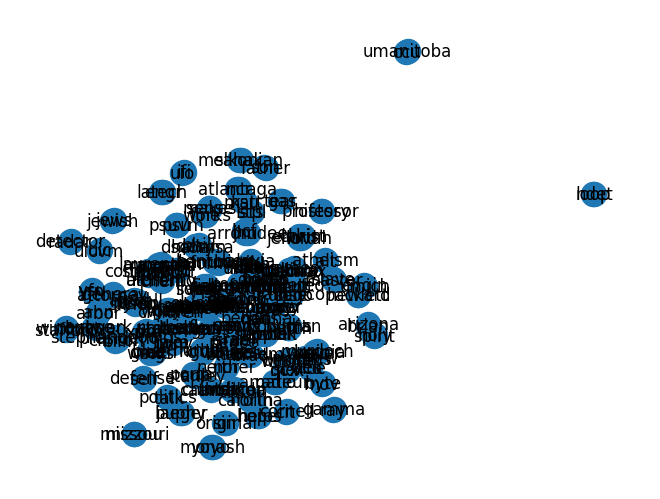

In [145]:
communities = list(nx.algorithms.community.greedy_modularity_communities(G))
print("All communities : ")
print(communities)

print("Filtered communities : ")
for comm in communities :
    if len(comm) <= 1 or len(comm) > 10 :
        G.remove_nodes_from(comm)     
    else :
        print(comm)
#Интерпретация сообществ - это  такое множество, в котором как минимум каждые два элемента часто используются в виде некоторого речевого оборота

nx.draw(G, with_labels=True)


Можно заметить некоторые пары слов в результирующем наборе, которые часто используются в одних предложениях а может быть и в одном речевом обороте 